In [436]:
import glob
import cv2

In [437]:
import numpy as np

In [438]:
import tensorflow as tf
import tensorflow

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

In [439]:
from sklearn.model_selection import train_test_split

In [440]:
import matplotlib.pyplot as plt
%matplotlib inline

In [441]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=5,
        horizontal_flip=True,
        fill_mode='nearest')

### Выбираем размер изображений

In [442]:
img_rows, img_cols = 110, 110
input_shape = (img_rows, img_cols, 1)

### Загружаем набор данных

In [443]:
labels = []
images = []

for image_name in glob.glob('/content/i/*.jpg'):
    items = image_name.rsplit('/',1)[1].split('_')

    label = items[0]
    if(label == "good"):
      classification = 1
    else:
      classification = 0
    labels.append(classification)
    image = cv2.imread(image_name)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image,(img_rows, img_cols), interpolation = cv2.INTER_AREA)
    gray_image = gray_image.reshape((img_rows, img_cols, 1))
    images.append(gray_image)

labels = np.array(labels)
images = np.array(images)

In [444]:
#нормализация изображений
images = images / 255.0

In [445]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [446]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

### Создаём модель

In [447]:
#Моя модель
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = Sequential()
model.add(Conv2D(48, kernel_size=(2, 2), activation='selu', input_shape=input_shape))
model.add(Conv2D(48, kernel_size=(2, 2), activation='selu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (2, 2), activation='selu'))
model.add(Conv2D(96, (2, 2), activation='selu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(194, (2, 2), activation='selu'))
model.add(Conv2D(194, (2, 2), activation='selu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(384, (2, 2), activation='selu'))
model.add(Conv2D(384, (2, 2), activation='selu'))
model.add(Conv2D(384, (2, 2), activation='selu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(384, (2, 2), activation='selu'))
model.add(Conv2D(384, (2, 2), activation='selu'))
model.add(Conv2D(384, (2, 2), activation='selu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(768, activation='selu'))
model.add(Dense(2, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_228 (Conv2D)                  │ (None, 109, 109, 48)        │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_229 (Conv2D)                  │ (None, 108, 108, 48)        │           9,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_76 (MaxPooling2D)      │ (None, 54, 54, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_230 (Conv2D)                  │ (None, 53, 53, 96)          │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_231 (Conv2D)                  │ (None, 52, 52, 96)          │          36,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_77 (MaxPooling2D)      │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_232 (Conv2D)                  │ (None, 25, 25, 194)         │          74,690 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_233 (Conv2D)                  │ (None, 24, 24, 194)         │         150,738 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_78 (MaxPooling2D)      │ (None, 12, 12, 194)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_234 (Conv2D)                  │ (None, 11, 11, 384)         │         298,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_235 (Conv2D)                  │ (None, 10, 10, 384)         │         590,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_236 (Conv2D)                  │ (None, 9, 9, 384)           │         590,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_79 (MaxPooling2D)      │ (None, 4, 4, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_237 (Conv2D)                  │ (None, 3, 3, 384)           │         590,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_238 (Conv2D)                  │ (None, 2, 2, 384)           │         590,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_239 (Conv2D)                  │ (None, 1, 1, 384)           │         590,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 1, 1, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 768)                 │         295,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 2)                   │           1,538 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,837,046 (14.64 MB)

 Trainable params: 3,837,046 (14.64 MB)

 Non-trainable params: 0 (0.00 B)

In [448]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.AdamW(learning_rate=0.00025, weight_decay=0.004, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
              metrics=['accuracy'])

### Обучаем модель

In [449]:
batch_size = 64
epochs = 75

In [450]:
history_callback =  model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                                        epochs=epochs,
                                        validation_data=(X_test, y_test))

Epoch 1/75


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 889ms/step - accuracy: 0.5720 - loss: 4.3633 - val_accuracy: 0.7664 - val_loss: 0.5488
Epoch 2/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.5739 - loss: 0.9322 - val_accuracy: 0.7664 - val_loss: 0.6361
Epoch 3/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6960 - loss: 0.6904 - val_accuracy: 0.8224 - val_loss: 0.6287
Epoch 4/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.6395 - loss: 0.6631 - val_accuracy: 0.2336 - val_loss: 0.9723
Epoch 5/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6133 - loss: 0.6864 - val_accuracy: 0.8224 - val_loss: 0.5717
Epoch 6/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.7289 - loss: 0.5961 - val_accuracy: 0.7757 - val_loss: 0.4649
Epoch 7/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.7530 - loss: 0.5209 - val_accuracy: 0.8692 - val_loss: 0.3965
Epoch 8/75
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8314 - loss: 0.3987 - val_accuracy: 0.5607 - val_loss: 0.6327
Ep

In [451]:
loss_history = history_callback.history["loss"]
val_loss_history = history_callback.history["val_loss"]
accuracy = history_callback.history["accuracy"]
val_accuracy = history_callback.history["val_accuracy"]

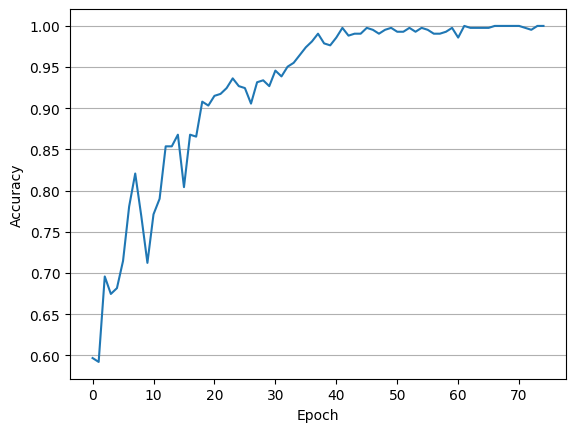

In [452]:
plt.plot(accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True, axis='y')
plt.show()

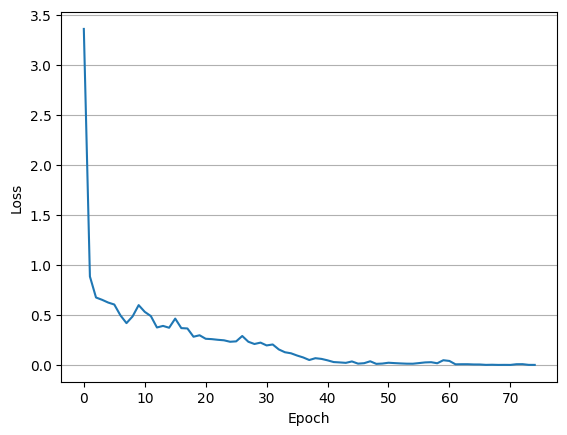

In [453]:
plt.plot(loss_history)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True, axis='y')
plt.show()

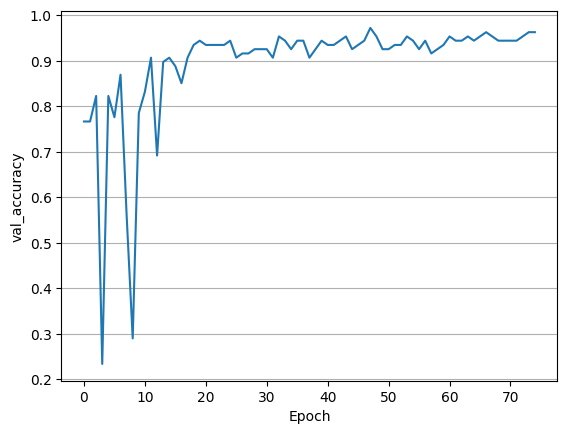

In [454]:
plt.plot(val_accuracy)
plt.ylabel('val_accuracy')
plt.xlabel('Epoch')
plt.grid(True, axis='y')
plt.show()

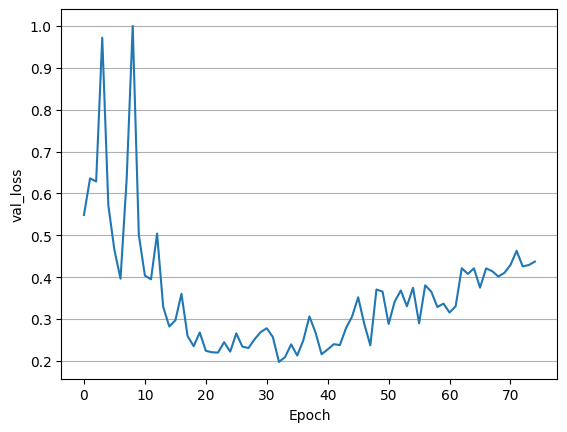

In [455]:
plt.plot(val_loss_history)
plt.ylabel('val_loss')
plt.xlabel('Epoch')
plt.grid(True, axis='y')
plt.show()

### Смотрим на предсказания

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
[9.9995327e-01 4.6711575e-05]
[0. 1.]


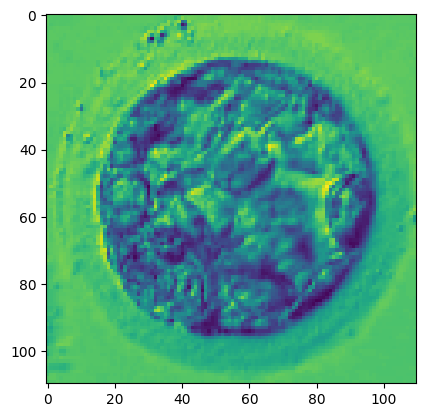

In [456]:
img_idx = 19
p_age = model.predict(np.array([X_test[img_idx]]))
print(p_age[0])
print(y_test[img_idx])
plt.imshow(X_test[img_idx].reshape(img_cols, img_rows))
plt.show()

In [457]:
!pip install git+https://github.com/paulgavrikov/visualkeras --upgrade

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-pr1ke26j
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-pr1ke26j
  Resolved https://github.com/paulgavrikov/visualkeras to commit 8d42f3a9128373eac7b4d38c23a17edc9357e3c9
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


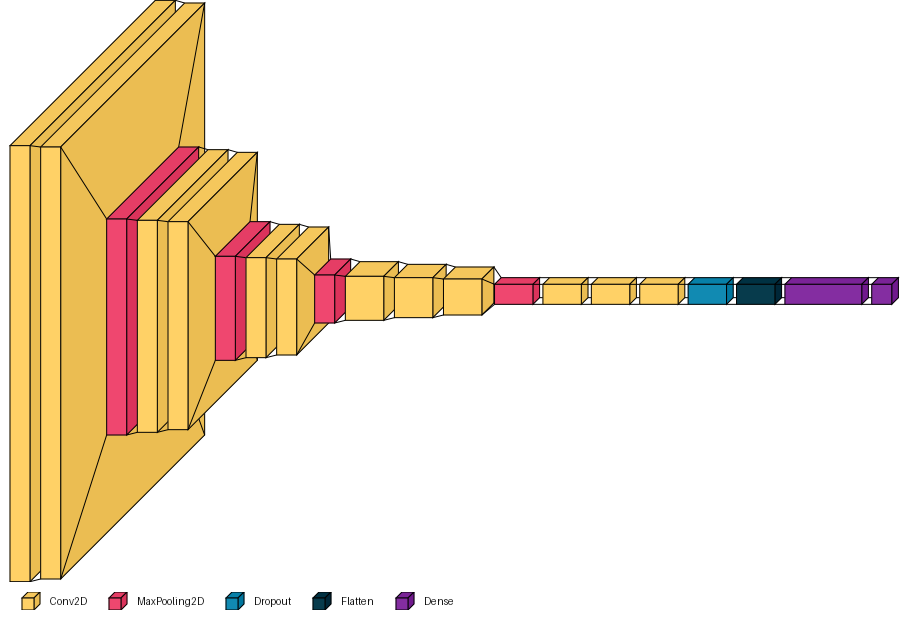

In [458]:
import visualkeras
from PIL import ImageFont

 # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font_color="#000000")